# Задача 3

Пусть дана реализация выборки $x_1, . . . , x_n$ из равномерного распределения на отрезке $[0; \Theta]$. Найдите оценку для неизвестного параметра $\Theta$ методом моментов и методом максимального правдоподобия. Исследуйте полученные оценки на несмещенность и состоятельность. Реализуйте эту задачу в Python:   
(1) сгенерируйте $\Theta$ из равномерного распределения на [25, 50];   
(2) сгенерируйте выборку из равномерного распределения на [0; $\Theta$] размера $n = 10, 100, 1 000, 10 000$;   
(3) найдите значения полученных оценок;    
(4) выведите отклонения полученных оценок от параметра $\Theta$. Что происходит с ростом n?

In [15]:
# загружаем библиотеку
import numpy as np

In [66]:
# фиксируем seed
np.random.seed(1)

In [67]:
# генерируем  Θ  из равномерного распределения на [25, 50];
Theta = np.random.uniform(25, 50)
print(Theta)

35.42555011756435


In [68]:
# генерируем выборку из равномерного распределения на [0;  Θ ] размера  𝑛=10,100,1000,10000
samples = {10**i: np.random.uniform(0, Theta, size=10**i) for i in range(1, 5)}
print(samples)

{10: array([2.55178914e+01, 4.05179082e-03, 1.07102977e+01, 5.19890817e+00,
       3.27114552e+00, 6.59837045e+00, 1.22416789e+01, 1.40557060e+01,
       1.90878792e+01, 1.48501963e+01]), 100: array([24.27427775,  7.24283342, 31.10779325,  0.97022056, 23.75168038,
       14.78325219, 19.79189452,  4.97328453,  7.01785423, 28.36681685,
       34.30119898, 11.10322393, 24.52590952, 31.04656784, 31.69193319,
        3.01273797,  1.38353718,  6.01633604, 31.10868127,  3.48399069,
       14.91796927, 33.93376356, 18.88767352, 24.51012738, 11.1773148 ,
       24.31967302, 29.56707357,  0.64787229, 26.57427502, 35.03094806,
       26.50417989,  9.9348827 , 27.96065441,  3.65683807, 15.86687456,
       32.18749553, 10.40144273, 10.19459968,  4.6063337 ,  0.68608514,
       24.04812219,  7.49704243,  9.40713649, 17.41424959,  1.89039752,
       20.33843201,  5.19794048, 20.87647283, 24.78932485,  3.62525344,
       14.66816115, 24.59950759, 14.67252847,  1.76962876, 18.98442499,
       23.51529

In [69]:
# считаем и выводим отклонение полученных оценок от параметра  Θ. Отклонение округляю до 5 знаков после запятой.
# с ростом n отклонение стремится к 0, оценка стремится к истинному значению
value = list()
for key, value in samples.items():
    theta_mm = 2*sum(value)/key
    thema_mmp = max(value)
    print(f"n={key}, Оценка_ММ={theta_mm}, Оценка_ММП={thema_mmp}, отклонение_мм={round(np.abs(theta_mm-Theta),5)}, отклонение_ммп={round(np.abs(thema_mmp-Theta),5)}")

n=10, Оценка_ММ=22.307225092931645, Оценка_ММП=25.517891443344325, отклонение_мм=13.11833, отклонение_ммп=9.90766
n=100, Оценка_ММ=36.45780392221056, Оценка_ММП=35.330710622061055, отклонение_мм=1.03225, отклонение_ммп=0.09484
n=1000, Оценка_ММ=35.61766254560036, Оценка_ММП=35.31053841956737, отклонение_мм=0.19211, отклонение_ммп=0.11501
n=10000, Оценка_ММ=35.32041742291972, Оценка_ММП=35.421149824051156, отклонение_мм=0.10513, отклонение_ммп=0.0044


In [70]:
from scipy import stats

In [72]:
# попробуем сделать оценку ММП с помощью библиотеки stats
value = list()
for key, value in samples.items():
    theta_mm = 2*sum(value)/key
    thema_mmp_loc,thema_mmp_scale = stats.uniform.fit(value)
    print(f"n={key}, Оценка_ММ={theta_mm}, Оценка_ММП={thema_mmp_loc+thema_mmp_scale}, отклонение_мм={round(np.abs(theta_mm-Theta),5)}, отклонение_ммп={round(np.abs(thema_mmp_loc+thema_mmp_scale-Theta),5)}")

n=10, Оценка_ММ=22.307225092931645, Оценка_ММП=25.517891443344325, отклонение_мм=13.11833, отклонение_ммп=9.90766
n=100, Оценка_ММ=36.45780392221056, Оценка_ММП=35.330710622061055, отклонение_мм=1.03225, отклонение_ммп=0.09484
n=1000, Оценка_ММ=35.61766254560036, Оценка_ММП=35.31053841956737, отклонение_мм=0.19211, отклонение_ммп=0.11501
n=10000, Оценка_ММ=35.32041742291972, Оценка_ММП=35.421149824051156, отклонение_мм=0.10513, отклонение_ммп=0.0044


# Задача 5

Пусть дана реализация выборки $x_1, . . . , x_n$ из нормального распределения $N(\Theta_1, \Theta^2_2)$. Найдите оценки для неизвестных параметров $\Theta_1, \Theta^2_2$ методом моментов и методом максимального правдоподобия. Являются ли оценки $\Theta_1$ несмещенными и состоятельными? Являются ли оценки $\Theta^2_2$ несмещенными? Сделайте какое-то предположение о состоятельности оценок на $\Theta^2_2$. Реализуйте эту задачу в Python:   
(1) сгенерируйте $\Theta_1$ из равномерного распределения на [−5, 5], а $\Theta^2_2$ — из равномерного распределения на [0.5, 10];   
(2) сгенерируйте выборку из нормального распределения $N(\Theta_1, \Theta^2_2)$ размера n = 10, 100, 1 000, 10 000;   
(3) найдите значения полученных оценок;   
(4) выведите отклонения полученных оценок от параметров $\Theta_1, \Theta^2_2$ Что происходит с ростом n?   

In [75]:
# фиксируем seed
np.random.seed(2)

In [76]:
# генерируем  Θ1 и Θ2  из равномерного распределения
Theta1 = np.random.uniform(-5, 5)
Theta2 = np.random.uniform(0.5, 10)
print(Theta1,Theta2)

-0.6400509785799624 0.7462992023649677


In [77]:
# генерируем выборку из нормального распределения размера  𝑛=10,100,1000,10000
mu=Theta1
sigma=Theta2**(0.5)
samples = {10**i: np.random.normal(mu, sigma, size=10**i) for i in range(1, 5)}
print(samples)

{10: array([-2.4854811 ,  0.77695618, -2.18937506, -1.36722483, -0.20561871,
       -1.71583805, -1.5540012 , -1.42533003, -0.16365749,  1.34015567]), 100: array([-0.60416567, -1.60581124, -0.17436599, -1.15506506, -0.65657755,
        0.37501625, -1.2861263 , -0.63225419, -1.39863619, -0.77519228,
       -0.41840333, -1.49424346, -0.93275457, -0.84408708, -1.19091228,
       -1.66601273, -1.86782079, -0.77265335, -0.87248555,  1.28759579,
       -2.74341286, -0.54266812, -0.32002909,  0.53451782, -0.20650351,
       -1.36935547, -0.64004255, -0.17152013, -0.91088635,  0.02601535,
       -2.25386854,  0.8554954 ,  0.62785566, -0.93003797, -0.11192217,
       -0.59860985, -1.35632943, -0.56427934,  0.22415121, -0.96927151,
       -0.96458657, -0.70438524, -0.26555952,  0.46432308, -1.18834161,
       -0.20085453, -0.45335136, -2.24568039, -1.00229266, -0.75436808,
       -0.67423516, -0.35842114, -2.40265771, -0.60009147, -1.22548549,
       -1.88356235, -0.18711858, -0.00485317, -1.204

In [78]:
# считаем и выводим отклонение полученных оценок от параметра  Θ1 и Θ2. Отклонение округляю до 5 знаков после запятой.
# отметим, что оценки для обоих методов получились одинаковые, поэтому я их посчитаю один раз
# с ростом n отклонение стремится к 0, оценка стремится к истинному значению
#value = list()
for key, value in samples.items():
    theta1_est = np.mean(value)
    array=np.array(value)
    theta2_est = sum((array-theta1_est)**2)/key
    print(f"n={key}, Оценка1={theta1_est}, Оценка2={theta2_est}, отклонение1={round(np.abs(theta1_est-Theta1),5)}, отклонение_2={round(np.abs(theta2_est-Theta2),5)}")

n=10, Оценка1=-0.898941462270596, Оценка2=1.461865228971915, отклонение1=0.25889, отклонение_2=0.71557
n=100, Оценка1=-0.6719062496258337, Оценка2=0.7642647334190467, отклонение1=0.03186, отклонение_2=0.01797
n=1000, Оценка1=-0.672229156102568, Оценка2=0.7346495073431137, отклонение1=0.03218, отклонение_2=0.01165
n=10000, Оценка1=-0.6509289356615358, Оценка2=0.7485092843111881, отклонение1=0.01088, отклонение_2=0.00221


In [79]:
# повторим оценку ММП с помщью библтотеки stats
for key, value in samples.items():
    theta1_est,theta2_est = stats.norm.fit(value)
    print(f"n={key}, Оценка1={theta1_est}, Оценка2={theta2_est}, отклонение1={round(np.abs(theta1_est-Theta1),5)}, отклонение_2={round(np.abs(theta2_est-Theta2),5)}")

n=10, Оценка1=-0.898941462270596, Оценка2=1.2090761882412187, отклонение1=0.25889, отклонение_2=0.46278
n=100, Оценка1=-0.6719062496258337, Оценка2=0.8742223592536664, отклонение1=0.03186, отклонение_2=0.12792
n=1000, Оценка1=-0.672229156102568, Оценка2=0.857116974130785, отклонение1=0.03218, отклонение_2=0.11082
n=10000, Оценка1=-0.6509289356615358, Оценка2=0.8651643105856761, отклонение1=0.01088, отклонение_2=0.11887


# Задача 6

В Python найдите с помощью метода Монте-Карло площадь заштрихованной желтым фигуры (см. рисунок ниже). Сколько случайных точек надо бросить в этот квадрат, чтобы получить значение площади с точностью 0.01 и с вероятностью примерно равной 0.997?

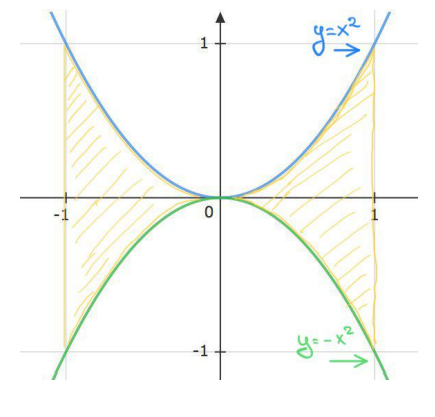

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(1)

In [90]:
def f1(x):
    return x**2

def f2(x):
    return -x**2

In [104]:
a, b = -1, 1
n=10000

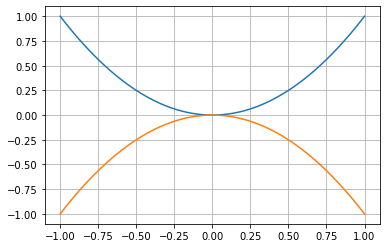

In [105]:
x_range = np.linspace(a, b, n)
plt.plot(x_range, [f(x) for x in x_range])
plt.plot(x_range, [f2(x) for x in x_range])
plt.grid()

In [106]:
#площадь методом Монте-Карло
x_range=np.random.uniform(a,b,n)
s=abs(f2(x_range).mean()*(b-a))+f1(x_range).mean()*(b-a)
print(s)

1.3289039825011708


Сколько случайных точек надо бросить в этот квадрат, чтобы получить значение площади с точностью 0.01 и с вероятностью примерно равной 0.997?

In [ ]:
np.random.seed(1)

In [ ]:
# считаем, сколько нужно сгенерировать точек (и округляем значение в большую сторону)
n = math.ceil((4*3*np.sqrt(np.pi/4*(1-np.pi/4))/0.005)**2) 
n